In [1]:
import geopandas as gpd

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
import pathlib
print(pathlib.Path().absolute())

C:\Users\Amalya


In [4]:
df = pd.read_csv("C:/Users/Amalya/Documents/Niv/Data Science Projects/tlv_cars/cars.csv")
df.sample(5)

,latitude,longitude,total_cars,cars_list,timestamp
19361107,32.04655,34.753380,1,[24],2019-10-30 02:48:02 UTC
10305535,32.14418,34.800120,1,[244],2020-02-16 20:48:03 UTC
16918305,32.04210,34.779484,0,[],2020-01-06 19:15:02 UTC
6946862,32.08870,34.796900,0,[],2019-11-18 04:03:02 UTC
7664458,32.04669,34.754670,1,[134],2019-11-05 04:21:02 UTC


In [5]:
df = df[df['total_cars'] > 0]

In [6]:
df_cars_by_time = df.groupby('timestamp').agg({'total_cars':'sum'}).reset_index()
df_cars_by_time_2020 = df_cars_by_time[df_cars_by_time.timestamp > '2019-11-01 00:00:00 UTC']


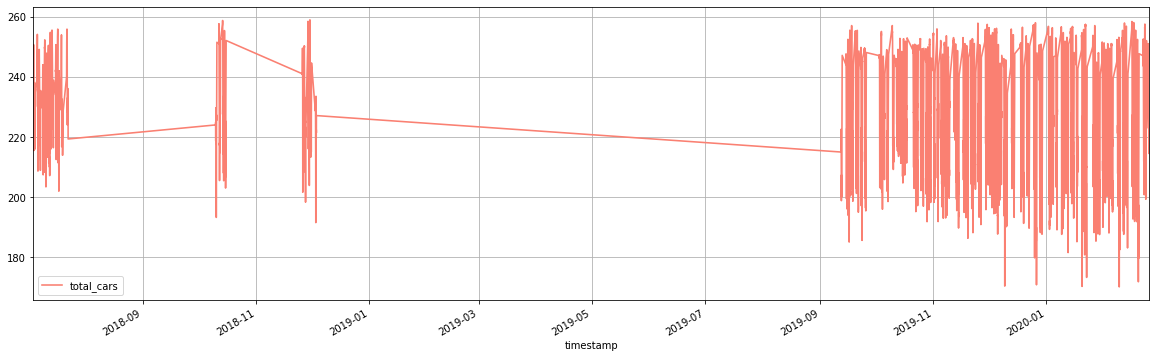

In [7]:
df_cars_by_time['timestamp'] = df_cars_by_time['timestamp'].apply(pd.Timestamp)
df_cars_by_time.set_index('timestamp').sort_index().rolling('60min').mean().plot(figsize=(20,6), c='salmon', lw=1.6)
plt.grid()
plt.show()

In [8]:
df_cars_by_time_2020.head()

,timestamp,total_cars
22384,2019-11-01 00:00:02 UTC,242
22385,2019-11-01 00:03:02 UTC,243
22386,2019-11-01 00:06:02 UTC,244
22387,2019-11-01 00:09:02 UTC,245
22388,2019-11-01 00:12:03 UTC,246


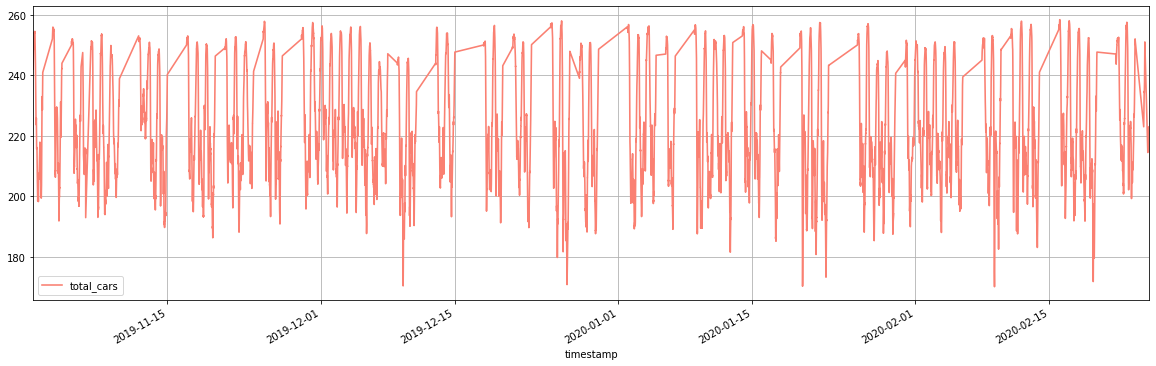

In [9]:
df_cars_by_time_2020['timestamp'] = df_cars_by_time_2020['timestamp'].apply(pd.Timestamp)
df_cars_by_time_2020.set_index('timestamp').sort_index().rolling('60min').mean().plot(figsize=(20,6), c='salmon', lw=1.6)
plt.grid()
plt.show()

In [10]:
rainDB = pd.read_csv("C:\\Users\\Amalya\\Documents\\Niv\\Data Science Projects\\tlv_cars\\ims_data.csv")

In [11]:
dates = pd.date_range(start="2019-11-01",end="2020-02-01")

In [12]:
def fixDate(str):
    tokens = str.split('-')
    return tokens[2]+"-"+tokens[1]+"-"+tokens[0]
    

In [13]:
import datetime
rainDB['date'] = rainDB.date.apply(lambda str: datetime.datetime.strptime(str, '%d-%m-%y'))

In [14]:
df_dates = pd.DataFrame(pd.date_range(start="2019-11-01",end="2020-02-01"),columns = ['date'])

In [15]:
df_dates.head()

,date
0,2019-11-01
1,2019-11-02
2,2019-11-03
3,2019-11-04
4,2019-11-05


In [16]:
rainDB = pd.read_csv("C:\\Users\\Amalya\\Documents\\Niv\\Data Science Projects\\tlv_cars\\ims_data.csv")

In [17]:
rainDB2 = rainDB

In [18]:
rainDB2['date'] = pd.to_datetime(rainDB.date, infer_datetime_format=False, dayfirst = True) 

In [19]:
merged = pd.merge(rainDB2,df_dates, on = 'date', how = 'outer')

In [20]:
merged = merged.sort_values(by = 'date', axis = 0)

In [21]:
merged = merged.drop(['station number'], axis = 1)

In [22]:
merged = merged.fillna(value = 0)

In [23]:
merged[merged.rain > 0].count() # 30 days with Precipitation out of 93 days

date    30
rain    30
dtype: int64

In [24]:
df_perc = merged


In [25]:
df_cars = pd.read_csv("C:/Users/Amalya/Documents/Niv/Data Science Projects/tlv_cars/cars.csv")

In [26]:
df_cars.dtypes

latitude      float64
longitude     float64
total_cars      int64
cars_list      object
timestamp      object
dtype: object

In [27]:
df_cars = df_cars[df_cars['total_cars'] > 0]

In [28]:
df_cars.head()

,latitude,longitude,total_cars,cars_list,timestamp
0,32.09004,34.79679,1,[138],2020-02-25 10:48:02 UTC
1,32.11614,34.79464,1,[64],2020-02-25 10:48:02 UTC
2,32.11876,34.82229,1,[120],2020-02-25 10:48:02 UTC
3,32.11226,34.83799,1,[110],2020-02-25 10:48:02 UTC
4,32.14279,34.79343,1,[190],2020-02-25 10:48:02 UTC


In [29]:
df_cars_by_time = df_cars.groupby('timestamp').agg({'total_cars':'sum'}).reset_index()

In [30]:
df_cars_by_time.head()

,timestamp,total_cars
0,2018-07-04 00:04:24 UTC,221
1,2018-07-04 00:09:26 UTC,221
2,2018-07-04 00:14:28 UTC,225
3,2018-07-04 00:19:30 UTC,227
4,2018-07-04 00:24:33 UTC,229


In [31]:
df_cars_by_day = df_cars_by_time

In [32]:
def only_date(s):
    s = s.split(' ')
    return s[0]
only_date('2018-07-04 00:24:33 UTC')

'2018-07-04'

In [33]:
df_cars_by_day['timestamp'] = df_cars_by_day.timestamp.apply(only_date)

In [34]:
df_cars_by_day_grouped =df_cars_by_day.groupby(by = 'timestamp', axis = 1)

In [35]:
df_cars = df_cars_by_day[df_cars_by_day['timestamp'] > '2019-11-01']

In [36]:
df_cars = df_cars[df_cars['timestamp'] <= '2020-03-03']

In [37]:
df_cars['usage'] = 260 - df_cars['total_cars']

In [38]:
df_cars['percentage'] = df_cars['usage']/260 

In [39]:
df_cars['timestamp'] = pd.to_datetime(df_cars.timestamp, infer_datetime_format=False, dayfirst = True)

In [40]:
df_cars.dtypes

timestamp     datetime64[ns]
total_cars             int64
usage                  int64
percentage           float64
dtype: object

In [41]:
df_cars_dailymean = df_cars.groupby('timestamp').mean()

In [42]:
df_cars_dailymean.head()

,total_cars,usage,percentage
timestamp,,,
2019-11-03,226.006250,33.993750,0.130745
2019-11-05,222.437500,37.562500,0.144471
2019-11-06,214.388889,45.611111,0.175427
2019-11-07,222.056250,37.943750,0.145937
2019-11-08,219.198276,40.801724,0.156930


In [43]:
df_perc.head()

,date,rain
30,2019-11-01,0.0
31,2019-11-02,0.0
32,2019-11-03,0.0
33,2019-11-04,0.0
34,2019-11-05,0.0


In [44]:
df_cars_and_rain = pd.merge(df_perc,df_cars_dailymean, how = 'outer', left_on = 'date', right_on = 'timestamp')

In [45]:
df_no_na = df_cars_and_rain.dropna(axis = 0)

In [46]:
df_no_na.head()

,date,rain,total_cars,usage,percentage
2,2019-11-03,0.0,226.006250,33.993750,0.130745
4,2019-11-05,0.0,222.437500,37.562500,0.144471
5,2019-11-06,0.0,214.388889,45.611111,0.175427
6,2019-11-07,0.0,222.056250,37.943750,0.145937
7,2019-11-08,0.0,219.198276,40.801724,0.156930


In [47]:
df_usage = df_no_na['percentage']

In [48]:
df_rain = df_no_na['rain']

In [49]:
df = df_no_na

In [50]:
correlation = df_usage.corr(df_rain)

In [51]:
correlation

0.21340327012340374

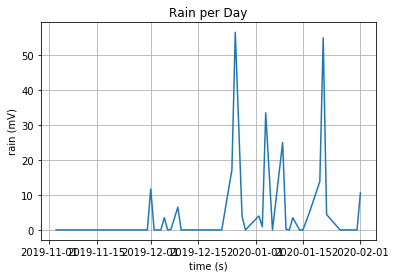

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

fig, ax = plt.subplots()
ax.plot(df['date'], df['rain'])

ax.set(xlabel='time (s)', ylabel='rain (mV)',
       title='Rain per Day')
ax.grid()

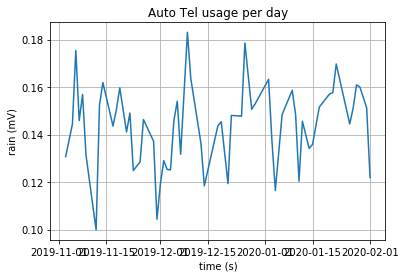

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

fig, ax = plt.subplots()
ax.plot(df['date'], df['percentage'])

ax.set(xlabel='time (s)', ylabel='rain (mV)',
       title='Auto Tel usage per day')
ax.grid()

# Mid-Way Conlustion
We can see that days with rain also had high percantage of car rentals. Though there are also days with no rain that also had man car rented

### To Be Continued